# Geospatial Data & Mapping In Python

**Step 1**

In [ ]:
# Install geopandas and descartes libraries
!conda install --yes geopandas descartes contextily

In [ ]:
# Install Folium Library
!pip install contextily folium

# If the above didn't work, try this
#!conda install --yes folium -c conda-forge

In [1]:
#for pandas/geopandas
import pandas as pd
import geopandas as gpd
import descartes
import contextily
import matplotlib.pyplot as plt

# for folium
import folium

## Set Up Your Filepath
I am doing this here to make the rest of the workshop smoother. We will be importing files in order to work with them. It will make sense why I am doing this later in the workshop

**Step 2**

In [11]:
# example: /Users/ep9k/Desktop/

my_path = '/Users/ep9k/Desktop/cville_gis_data/'   ##### YOUR FILEPATH GOES HERE

## Pandas - A quick overview

If you are not familiar with it, [Pandas](https://pandas.pydata.org/) is a widely used python library (along with its counterparts Matplotlib, NumPy, SciPy, etc..) which allows data analysis and manipulation. Pandas uses **dataframes**, which are a spreadsheet-like data type, to allow you to manipulate your data much in the same way you can in Microsoft Excel or similar programs.

**Step 3**

In [ ]:
# Create an example dataframe

# initialize data of lists.
data = {'Name': ['Amy', 'Nick', 'John', 'Emily'],
        'Age': [20, 21, 19, 18]}
  
# Create DataFrame
df = pd.DataFrame(data)
  
# Print the output.
df

## GeoPandas

**From the [GeoPandas Documentation](https://geopandas.org/en/stable/index.html)**: GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [Shapely](https://shapely.readthedocs.io/en/stable/). Geopandas further depends on [Fiona](https://fiona.readthedocs.io/en/latest/) for file access and [MatPlotLib](https://matplotlib.org/) for plotting.

Basically, GeoPandas allows python users to do mapping, plotting, and geospatial operations all within python. No more mixing between other programs!

#### A Note on our data source

All the data we are using today is from the [City of Charlottesville's Open Data Portal](https://opendata.charlottesville.org/). This is freely available data that the city provides to the public. 

**Step 4**

In [ ]:
# Reading GeoJSON.  GeoJSON is a common geospatial data format that you will encounter. It is basically just structured text.
cville_boundary = gpd.read_file(my_path + '/Charlottesville_Basemap.geojson')

In [ ]:
cville_boundary.plot()

### GeoPandas GeoDataFrame

In GeoPandas, the GeoDataFrame is a common data type. This is basically just like a Pandas dataframe but with a geometry component. 

**Step 5**

In [ ]:
print(type(df))                  # normal pandas dataframe
print(type(cville_boundary))     # geopandas geodataframe

In [ ]:
# let's take a look and see what is inside this GeoDataFrame
cville_boundary

In a GeoDataFrame, there is a **geometry** column. This column holds the spatial information about the object(s) in the GeoDataFrame. This will look different depending on what type of object the GeoDataFrame is (point, line, polygon, multipolygon, etc.)

In [ ]:
print(cville_boundary.columns.to_list())
print()
print(cville_boundary['geometry'])

**Step 6**

In [ ]:
# now we read in roads layer. Notice that this is a little more exciting as there are quite a few roads within city limits

roads = gpd.read_file(my_path + 'Road_centerlines.shp')
roads

In [ ]:
# Now let's look at the roads layer.

roads.plot()

### Overlay multiple layers

Plot differenty layers on top of each other, basically stacking them on top of one another.
We are not just limited to two layers, you can stack many layers

**Step 7**

In [ ]:
# why is this setup used for multiple layers??
# because the docs say so! ex: https://geopandas.org/en/stable/docs/user_guide/mapping.html?highlight=multiple%20layers#control-the-order-of-multiple-layers-in-a-plot

fig, ax = plt.subplots(figsize=(10,8))
cville_boundary.plot(ax=ax, edgecolor='black')
roads.plot(ax=ax, color='white')

### Add a basemap

Basemaps are commonly satellite or similar imagery that is used as a locator or for backdrop.
We will use the Contextily library as a basemap in this case

**Step 8**

In [ ]:
# find this code in geopanda docs: https://geopandas.org/en/stable/gallery/plotting_basemap_background.html?highlight=basemap

ax = cville_boundary.plot(figsize=(10,8), alpha=0.5)
contextily.add_basemap(ax, crs=roads.crs)

## Working with Coordinate Reference Systems and Map Projections

This is a big topic that we will not go too far into. Basically, the age old issue that geographers have faced it how to represent a round object (the earth) on a flat image such as a book, paper, computer screen, etc. At some point, coordinate reference systems and map projections were created in order to do that. 

The very short explanation of these two terms...

**Coordinate Reference System (CRS)**
Everything on the earth has a location. Today, this is commonly represented in latitude/longitude or XY coordinates. For example, Charlottesville is located at (38.03, -78.48) or 38.03N, 78.48W. 

**Map Projections**
Though everything on the earth has an exact location, it is not always represented the same. This is where map projections come into play. Basically, a map projection is focused on representing various parts of the earth as accurately as possible. There are hundreds (maybe thousands?) of map projections and they can range in focus from parts of individual states, north america, eastern hemisphere, southern hemisphere, etc. 

**Step 9**

What are we currently using?

In [ ]:
# WGS 1984 is a commonly used map projection that represents the entire world and is measured in decimal degrees
cville_boundary.crs

#### Change the CRS of a layer(s)

If you don't like the CRS your data comes with or need to change it, you can do that

**Step 10**

In [ ]:
#I will change both layers to a CRS that measures in feet
# EPSG 32046 is a Virginia State Plane CRS measured in feet

cville_boundary = cville_boundary.to_crs(epsg = 32046)
roads = roads.to_crs(epsg = 32046)

In [ ]:
# and plot them again. Notice the units of measurement are now different! (Now in feet)

fig, ax = plt.subplots(figsize=(10,8))
cville_boundary.rotate(90)
cville_boundary.plot(ax=ax, edgecolor='black')
roads.plot(ax=ax, color='white')

## Geospatial Operations

Some of the many amazing things that GeoPandas can do are geospatial operations previously unavailable (to my knowledge) in python. Now, you don't have to do them using another GIS software such as ArcGIS or QGIS or a Geospatial Database such as PostgreSQL. You can do it right in python!

Let's do a few common geospatial operations such as intersections, measuring distances, manipulating the attribute table, etc.

**Step 11**

In [ ]:
neighborhoods = gpd.read_file(my_path + '/neighborhoods.geojson')

neighborhoods.plot(column='NAME', cmap='ocean')

neighborhoods

In [ ]:
# convert our new layers to the same CRS as the others
neighborhoods = neighborhoods.to_crs(epsg = 32046)

### Intersections

We will now how layers intersect with each other. First I will make a new layer that is just the Woolen Mills neighborhood

**Step 12**

In [ ]:
# using exactly the same methods as in regular pandas to extract the data I want
woolen_mills = neighborhoods.loc[neighborhoods['NAME'] == 'Woolen Mills']
woolen_mills = woolen_mills.to_crs(epsg = 32046)
woolen_mills.plot()



# plot the new woolen mills layer over the cville_boundary layer
#fig, ax = plt.subplots(figsize=(10,8))
#cville_boundary.plot(ax=ax, edgecolor='black')
#woolen_mills.plot(ax=ax, color='red', edgecolor='black')



In [ ]:
woolen_mills_roads = gpd.overlay(roads, woolen_mills, how='intersection')

#plot all of charlottesville, woolen mills, roads, and the roads in woolen mills
fig, ax = plt.subplots(figsize=(10,8))
cville_boundary.plot(ax=ax, edgecolor='black')
roads.plot(ax=ax, color='white')
woolen_mills.plot(ax=ax, color='red', edgecolor='black')
woolen_mills_roads.plot(ax=ax, color='black')

### Buffers

Another common operation is to create a buffer around an object

**Step 13**

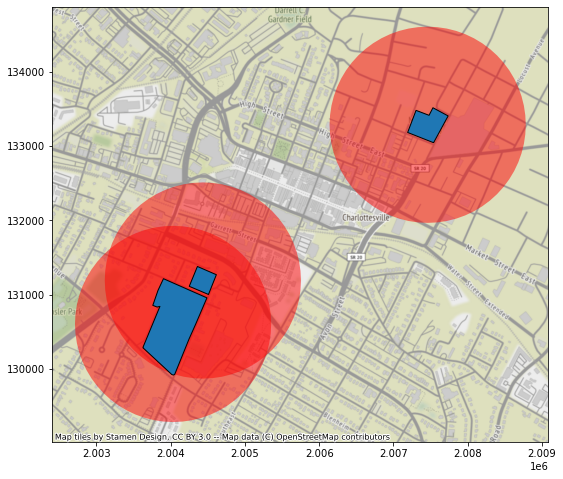

In [12]:
# first, let's import a few new layers

cemetaries = gpd.read_file(my_path + '/cemetaries.geojson')
cemetaries = cemetaries.to_crs(32046)

# the cemetaries are polygons (shapes) of the entire cemetary. I want to measure distance point to point in this case
# I will create a centroid point for each of the cemetaries
cemetaries['centroid'] = cemetaries.centroid

cemetaries['buffer'] = cemetaries['centroid'].buffer(1320)    #remember, this is being measured in feet. 1320 feet is 1/4 mile
 
cemetaries_buffer = cemetaries['buffer']

fig, ax = plt.subplots(figsize=(10,8))
cemetaries_buffer.plot(ax=ax, color='red', alpha=0.5)
cemetaries.plot(ax=ax, edgecolor='black')
contextily.add_basemap(ax, crs=cemetaries.crs)


### Exporting files

You can export a GeoDataFrame to one of many geospatial file types such as geopackage, ESRI Shapefile, geoJSON, etc.

In [ ]:
#look in your data folder and you should have a new layer with the name 'NEW_GEOPACKAGE'
roads.to_file(my_path + 'NEW_GEOPACKAGE', layer='MY_NEW_LAYER', driver='GPKG')

## Folium

[Folium](http://python-visualization.github.io/folium/) is another python mapping library built on the popular Leaflet javascript library. Now, we can make nice web maps with python instead of javascript! The strength of folium is in its mapping capabilities. This is not a data manipulation library in the way that GeoPandas is. 

The following code examples I have taken mostly from the [Folium Docs](http://python-visualization.github.io/folium/quickstart.html) with very slight modifications. 

**Step 14**

In [21]:
m = folium.Map(location=[37.5407, -77.436], zoom_start=10)
m

### Add Data to the map

We can add all the same kinds of data we had previously used.

**Step 15**

In [19]:
# notice that I am streaming this data from a URL provided by the city of Richmond's data portal: https://richmond-geo-hub-cor.hub.arcgis.com/datasets/cor::public-libraries/about
richmond_libraries = f"https://services1.arcgis.com/k3vhq11XkBNeeOfM/arcgis/rest/services/PublicLibrary/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

m = folium.Map(
    location=[37.5407, -77.436],
    zoom_start=11,
)

folium.GeoJson(richmond_libraries, name="geojson").add_to(m)

m

## Choropleth Maps

Folium has some really nice looking mapping capabilities. These go far and beyond the simple plots of geopandas and matplotlib

In [22]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m